# The Illustrated Transformer Theory
Link: https://jalammar.github.io/illustrated-transformer/

# Basic Overview

A black box which contains two blocks: Encoders and Decoders\
Majorly they both have same structure - A combination of Attention Layer and Feed Forward Layer (Multi Layer Preceptron)

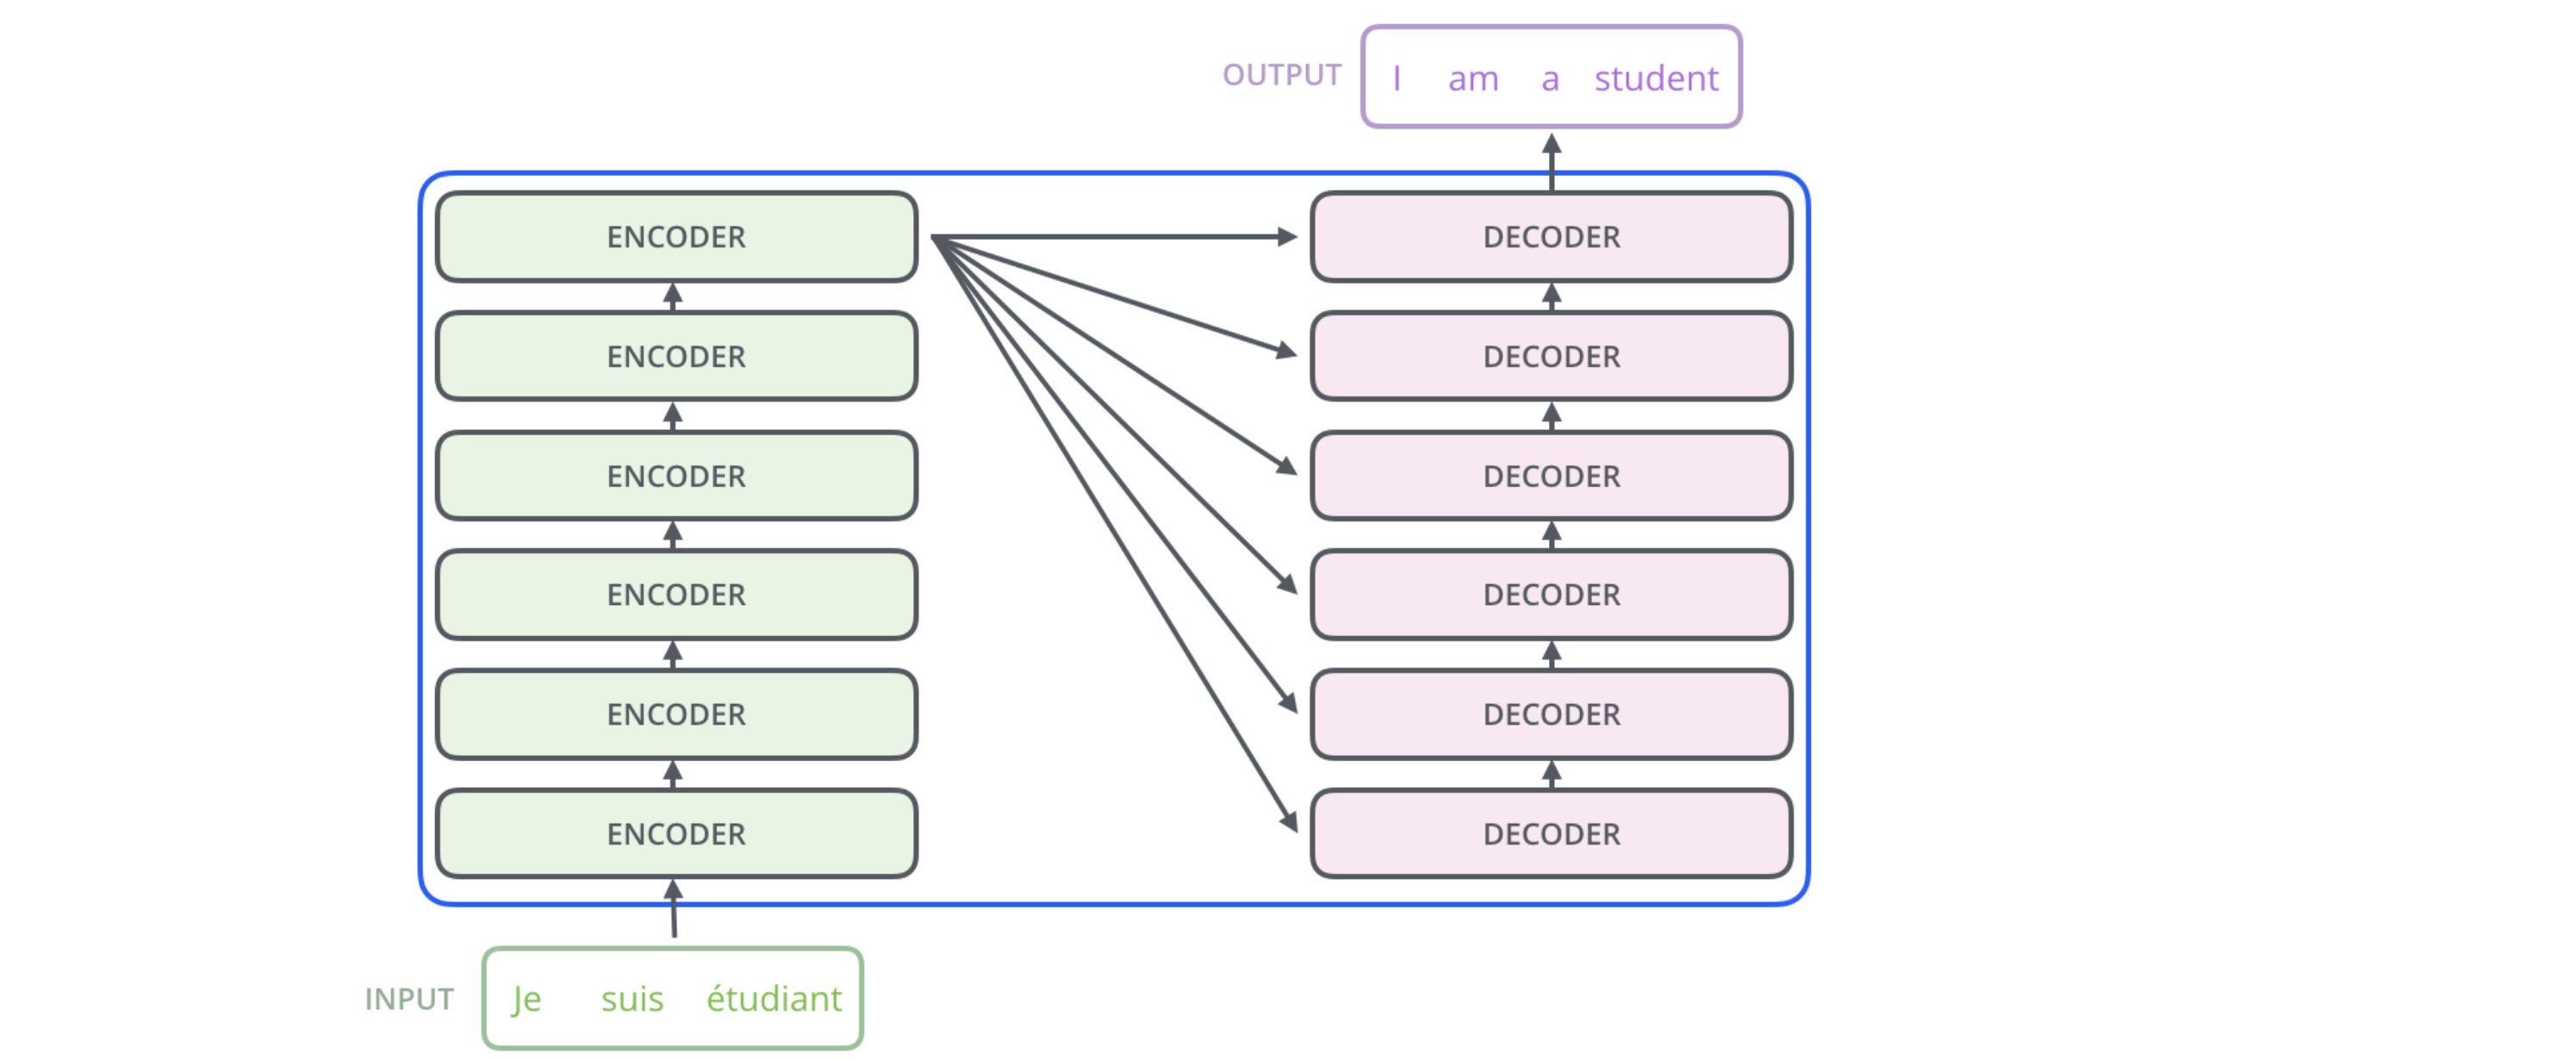
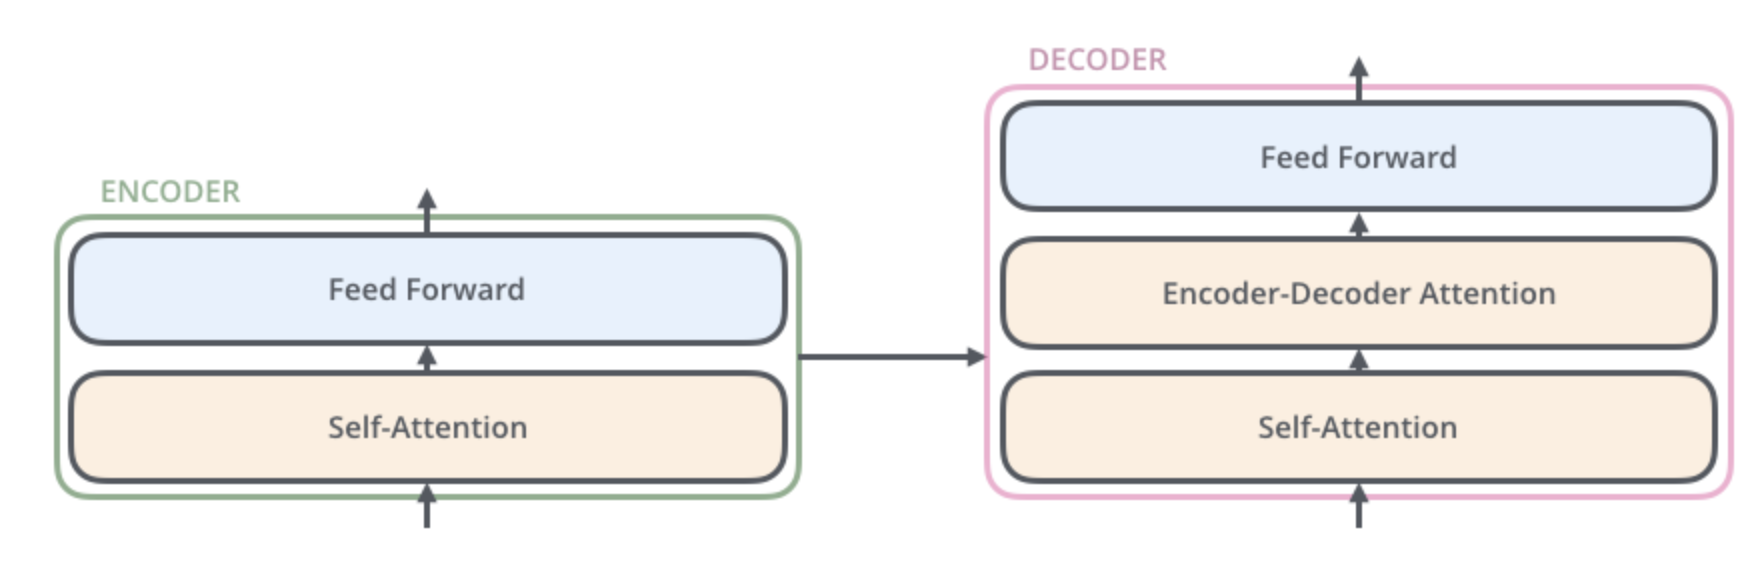

## Self Attention
Not some out of the world calculus basic matrix operations\
Attention is used to calculate the importance of each word in the sentence like in this sentence:"The animal didn't cross the street because it was too tired"\
What does it signify? is it animal or street\

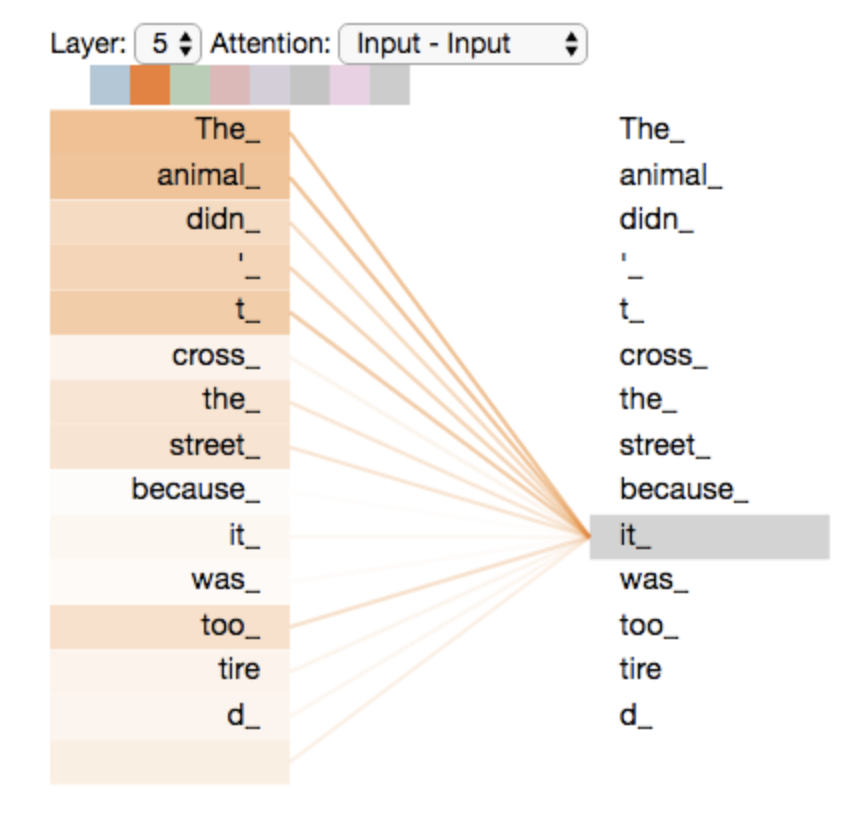

### Maths

Mainly 4 Vectors are used:
- Embedding of word or token
- Key vector
- Query vector
- Value vector\
They’re abstractions that are useful for calculating and thinking about attention.

The score is calculated by taking the dot product of the query vector with the key vector of the respective word we’re scoring. So if we’re processing the self-attention for the word in position #1, the first score would be the dot product of q1 and k1. The second score would be the dot product of q1 and k2.
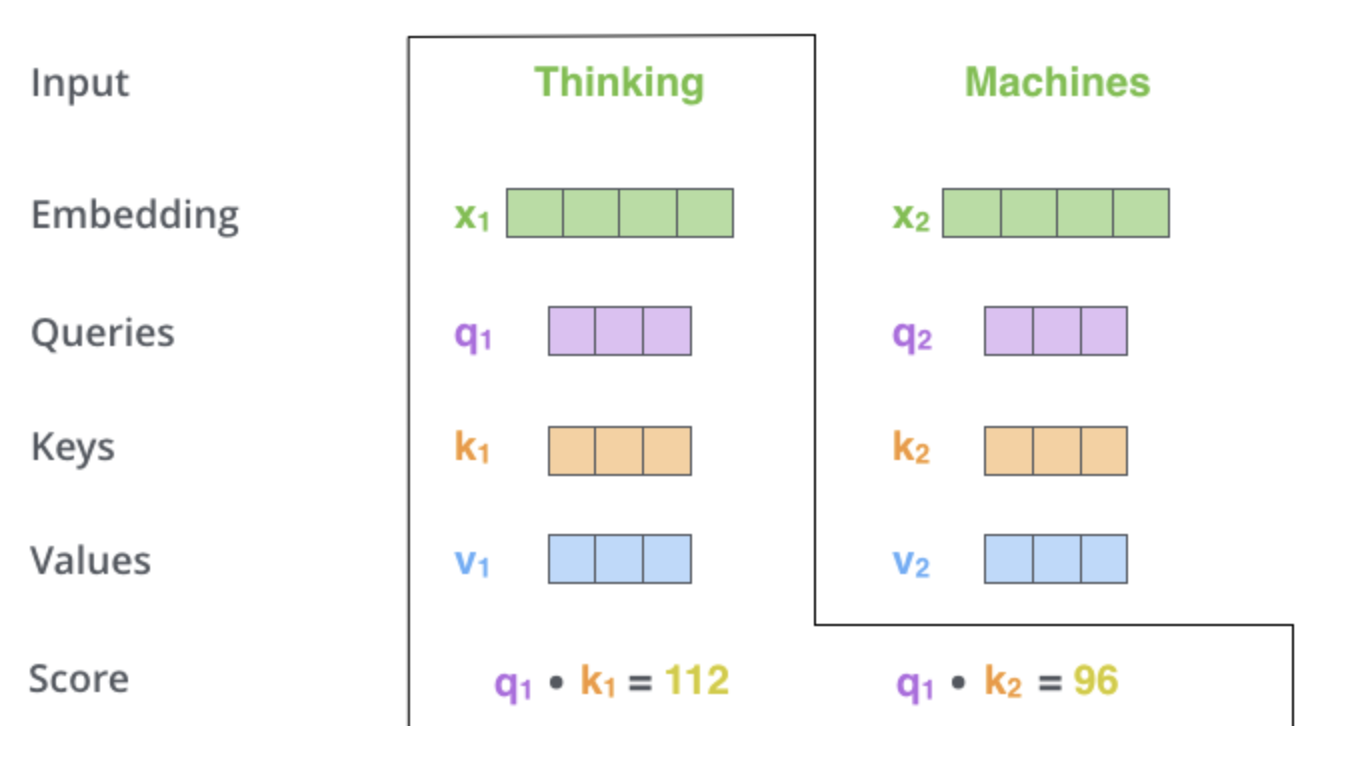


The third and fourth steps are to divide the scores by 8 (the square root of the dimension of the key vectors used in the paper – 64. This leads to having more stable gradients. There could be other possible values here, but this is the default), then pass the result through a softmax operation. Softmax normalizes the scores so they’re all positive and add up to 1.
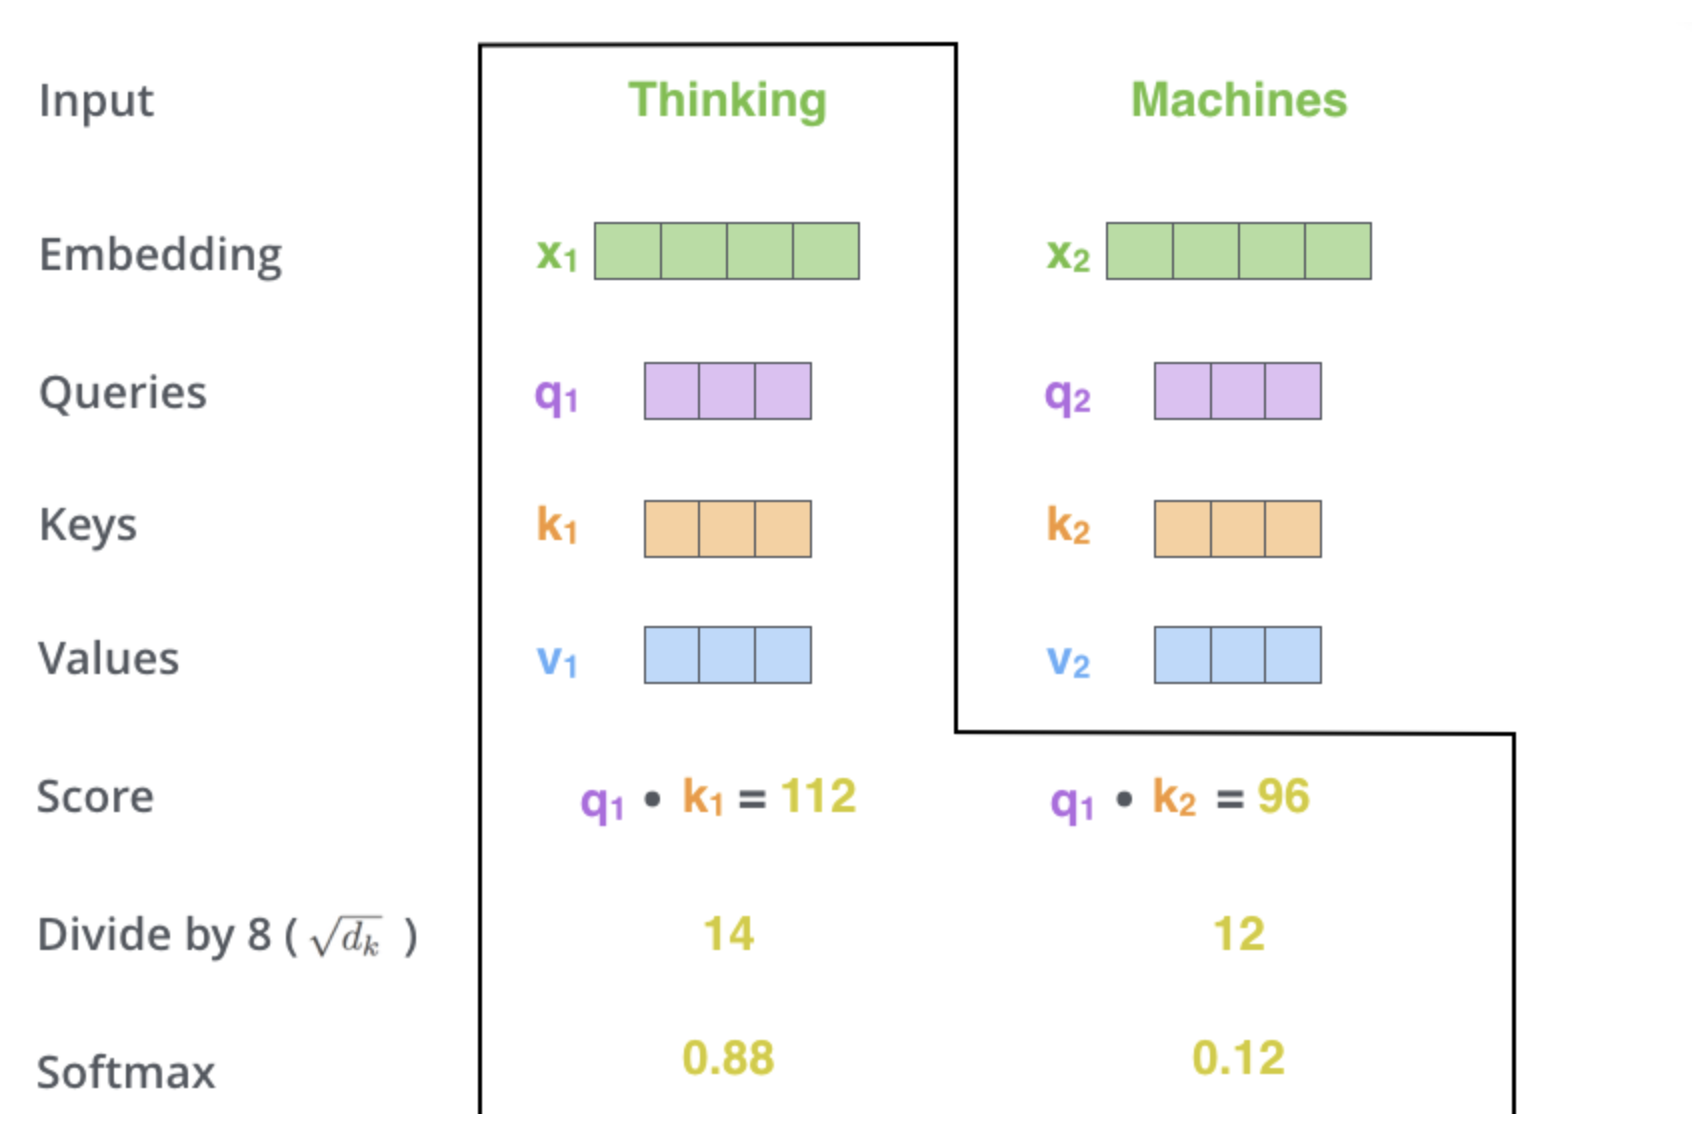


This softmax score determines how much each word will be expressed at this position. Clearly the word at this position will have the highest softmax score, but sometimes it’s useful to attend to another word that is relevant to the current word.


The fifth step is to multiply each value vector by the softmax score (in preparation to sum them up). The intuition here is to keep intact the values of the word(s) we want to focus on, and drown-out irrelevant words (by multiplying them by tiny numbers like 0.001, for example).


The sixth step is to sum up the weighted value vectors. This produces the output of the self-attention layer at this position (for the first word).

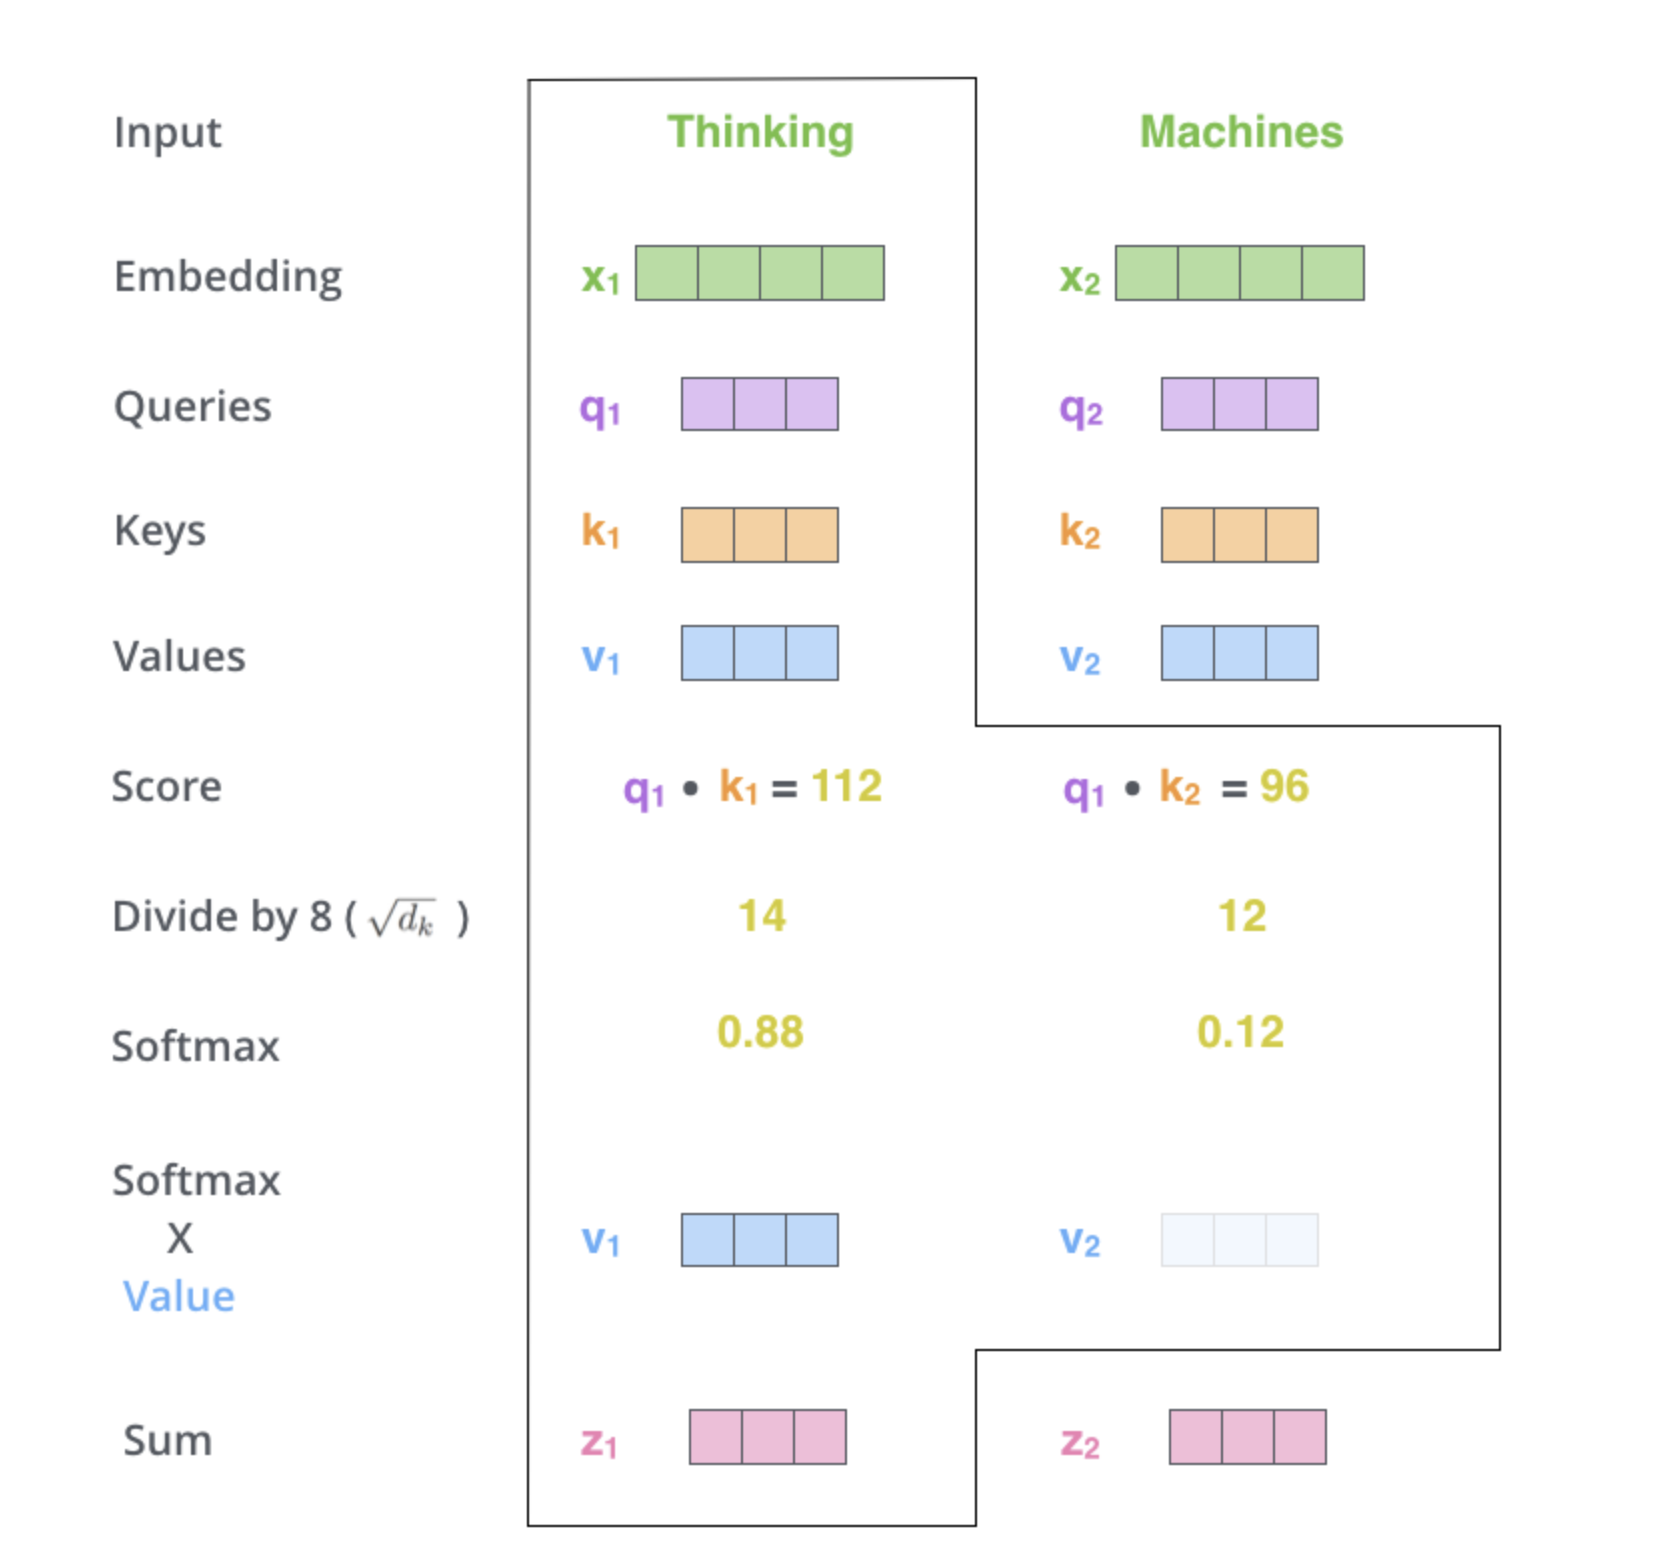


### Matrix Multiprication (Easy)

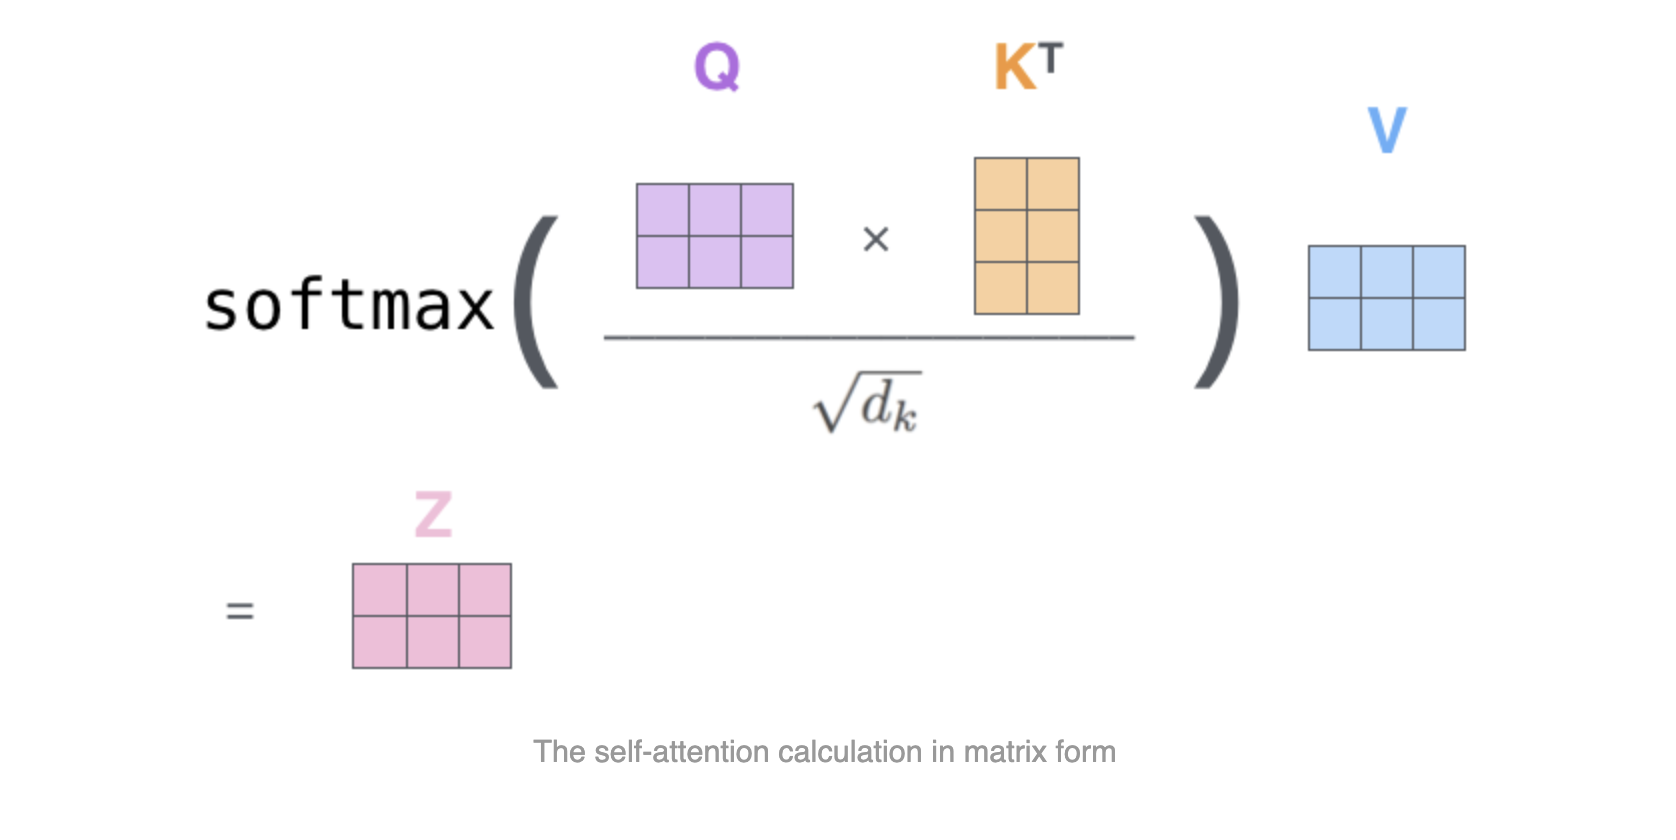


## Multi Head Attention
Nothing but having multiple heads of the same attention mechanism.\
Focus on different positions\
Adding more probabilty and more parameters to train

## Positonal Encoding

Adding a new postional embedding on to word or token embedding in order to account for order of words in sequence

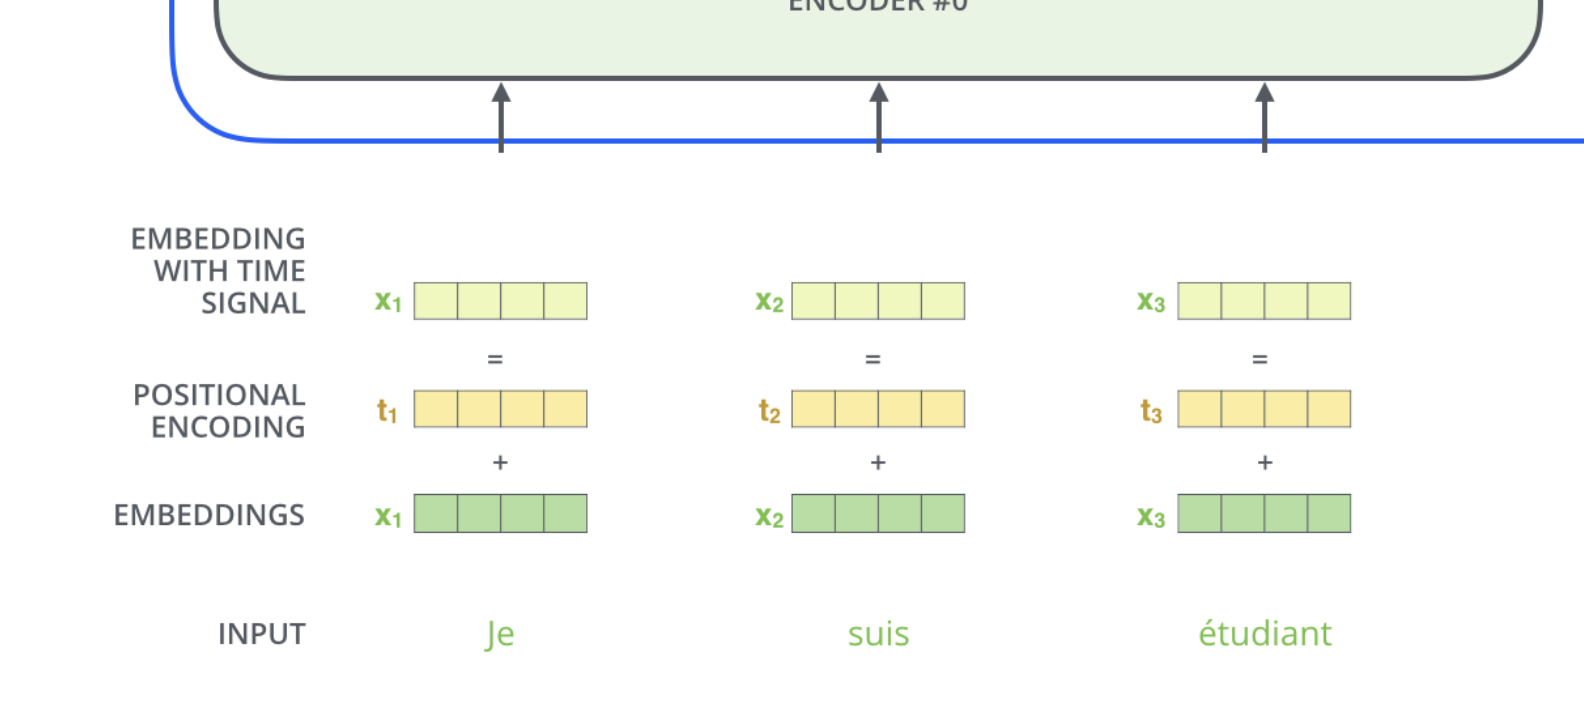

## Residuals

One detail in the architecture of the encoder that we need to mention before moving on, is that each sub-layer (self-attention, ffnn) in each encoder has a residual connection around it, and is followed by a layer-normalization step.
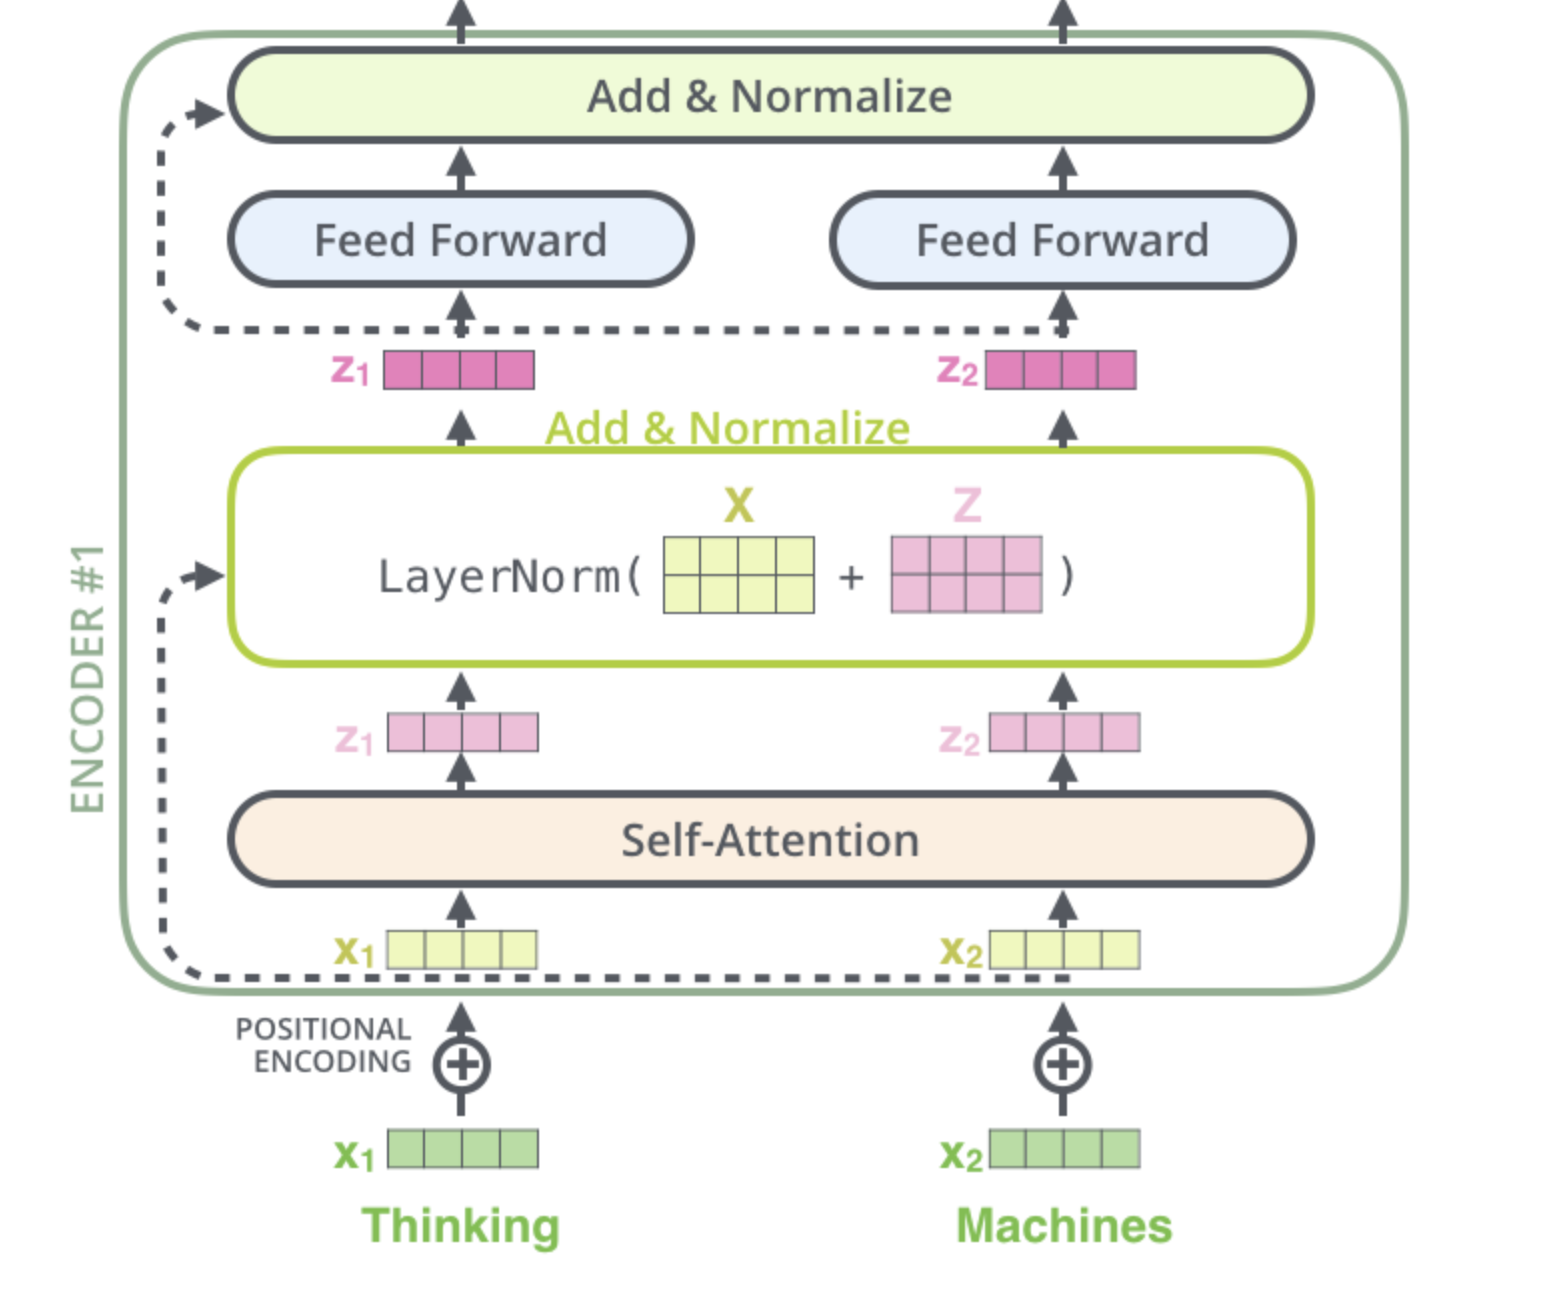

## Decorder

Similar to encoder but only self-attention layer is only allowed to attend to earlier positions in the output sequence. This is done by masking future positions (setting them to -inf) before the softmax step in the self-attention calculation.

## Final Layer

(Decoder stack embeddings) Linear Layer (logits) -> Softmax (log probabilites)-> output word or token

## Loss 

One-hot encoding the label in vocabulary of model, trying to reach it with softmax.\
 We simply subtract one from the other. For more details, look at cross-entropy and Kullback–Leibler divergence.

 #### Interesting take away:
 That’s one way to do it (called greedy decoding). Another way to do it would be to hold on to, say, the top two words (say, ‘I’ and ‘a’ for example), then in the next step, run the model twice: once assuming the first output position was the word ‘I’, and another time assuming the first output position was the word ‘a’, and whichever version produced less error considering both positions #1 and #2 is kept. We repeat this for positions #2 and #3…etc. This method is called “beam search”, where in our example, beam_size was two (meaning that at all times, two partial hypotheses (unfinished translations) are kept in memory), and top_beams is also two (meaning we’ll return two translations). These are both hyperparameters that you can experiment with.